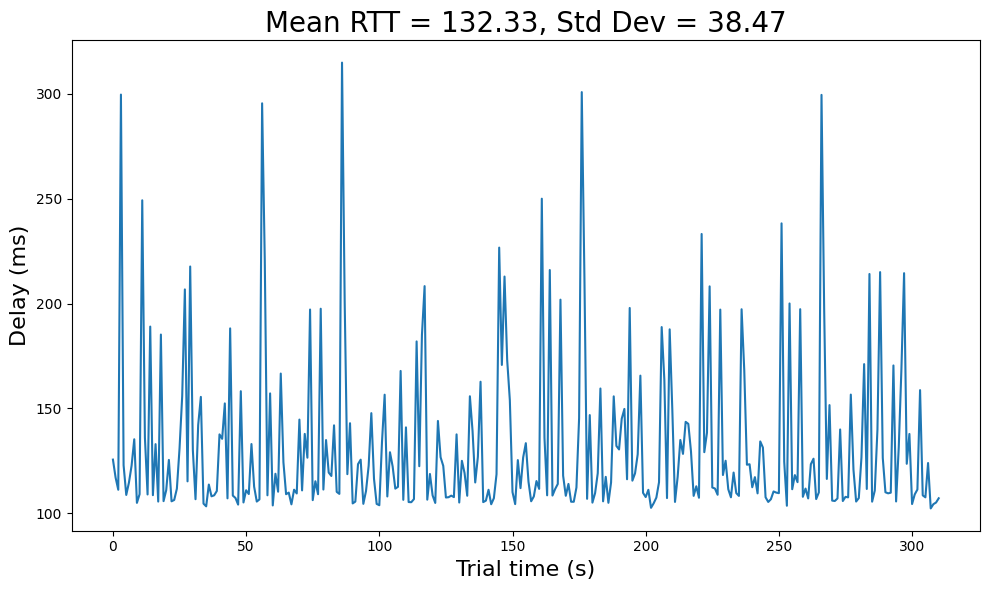

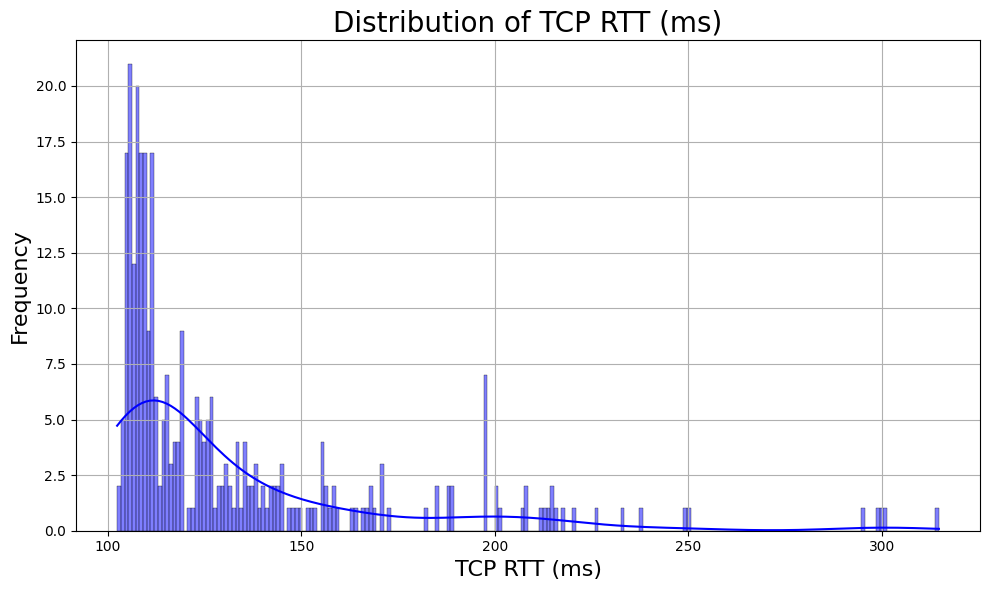

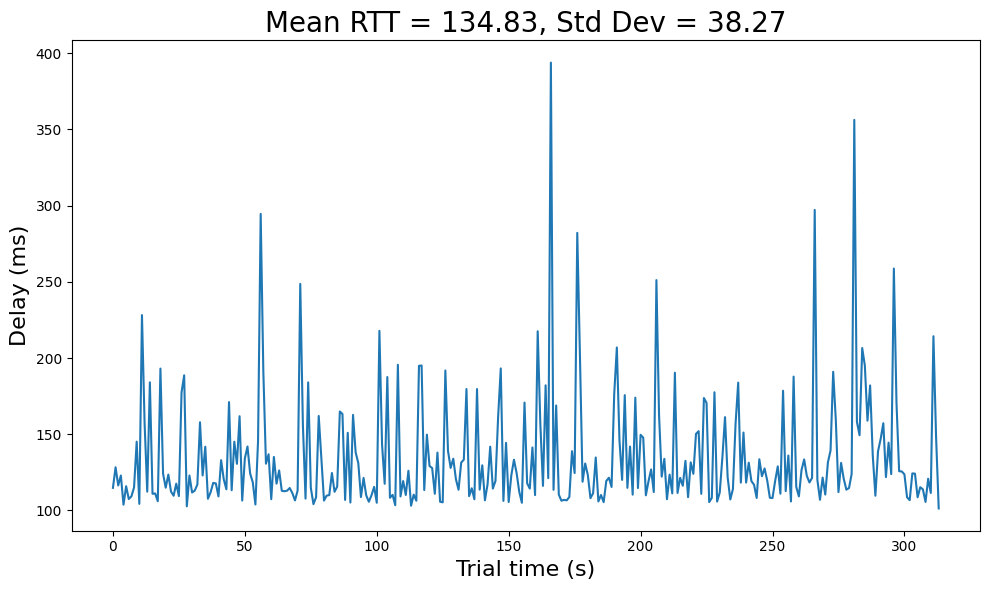

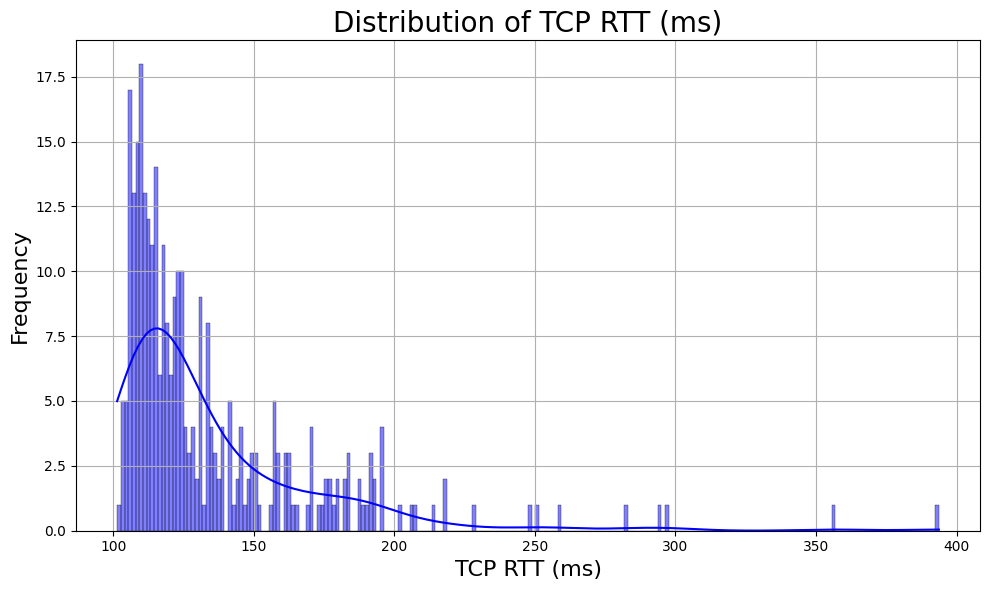

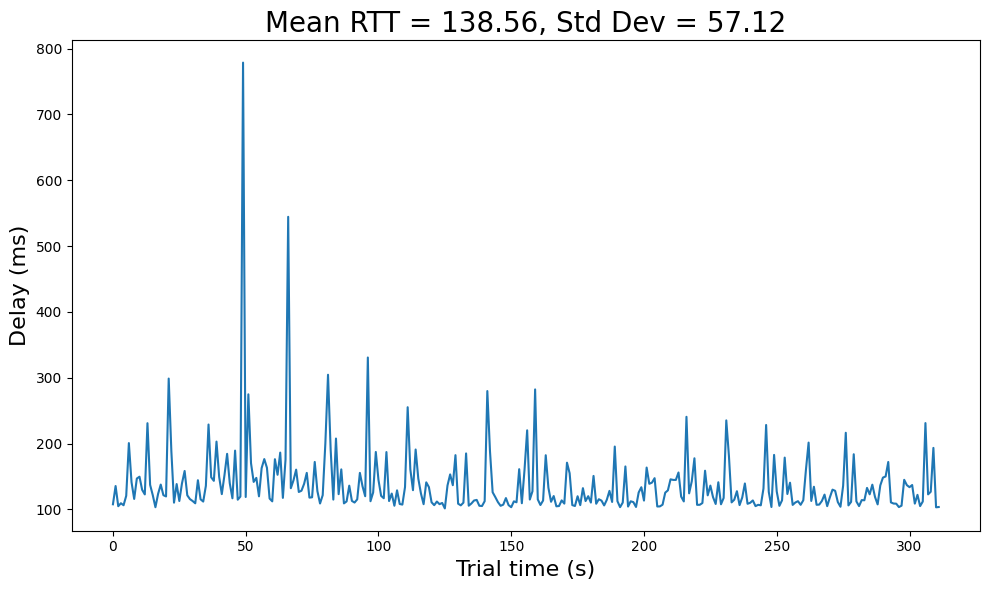

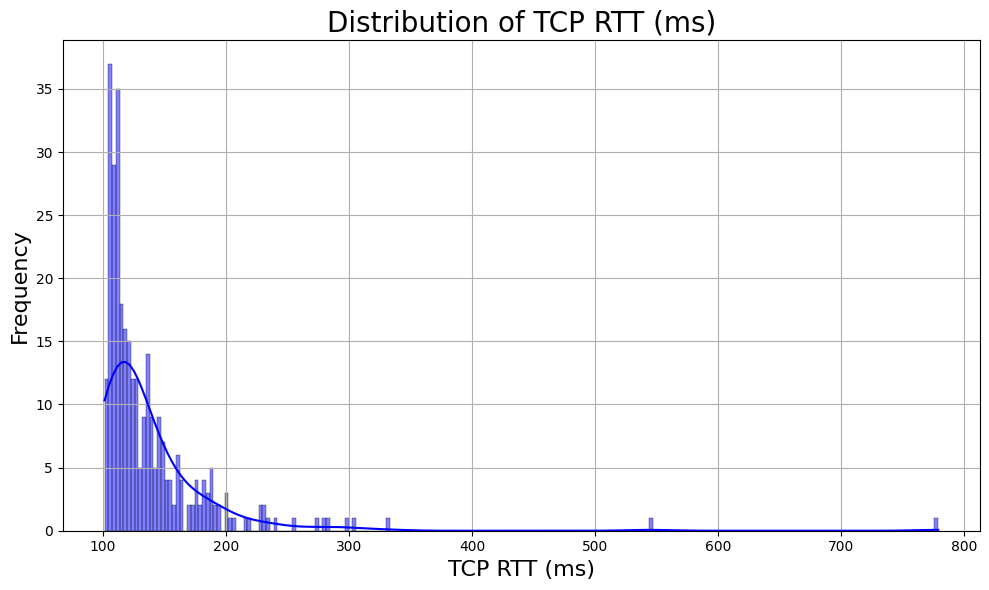

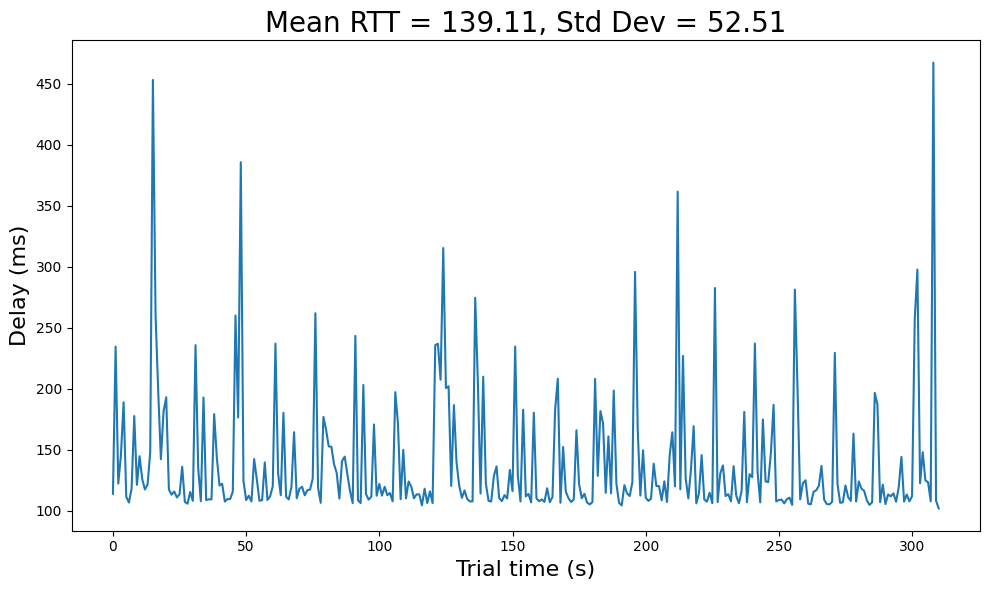

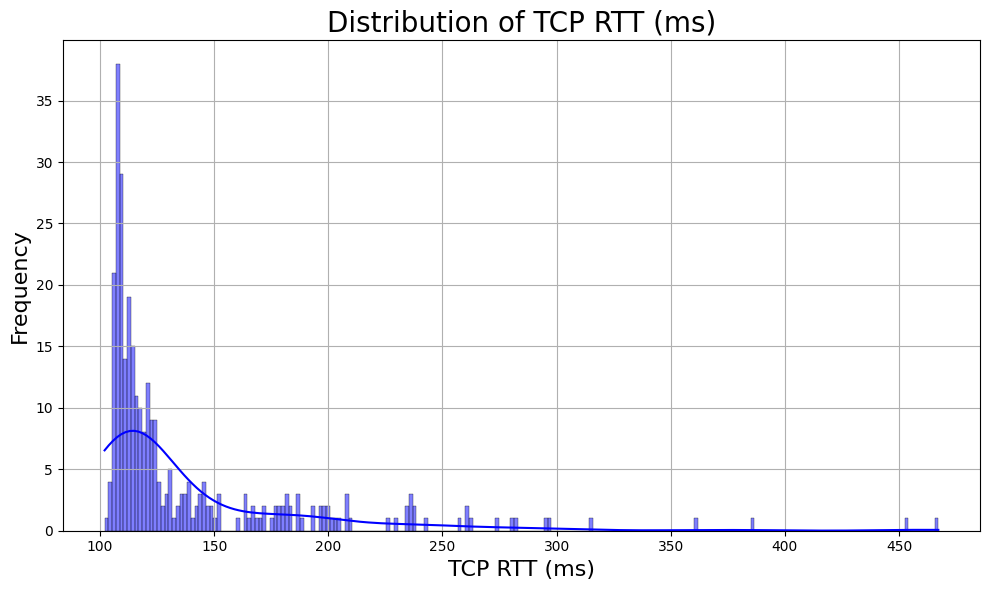

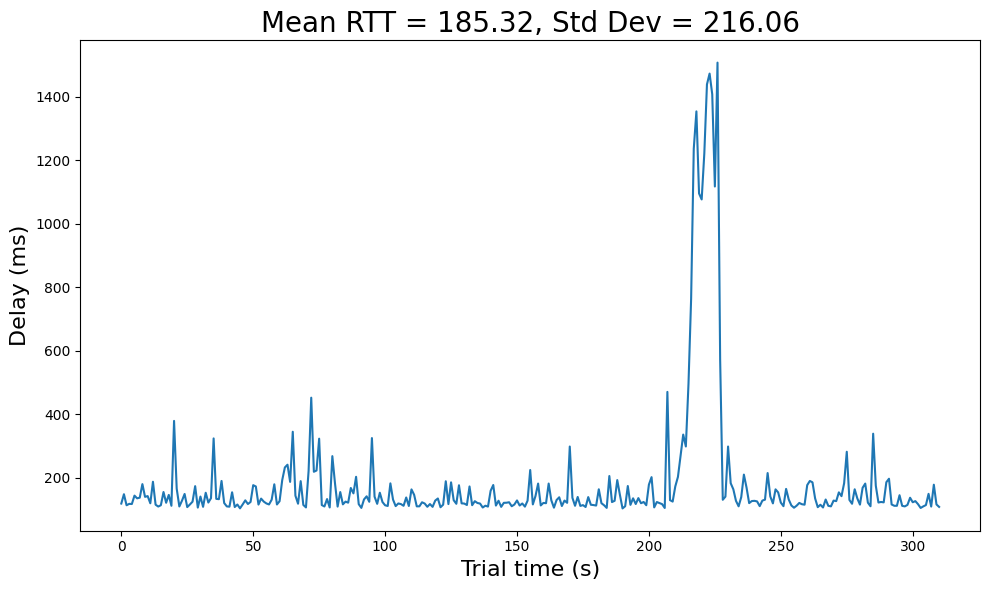

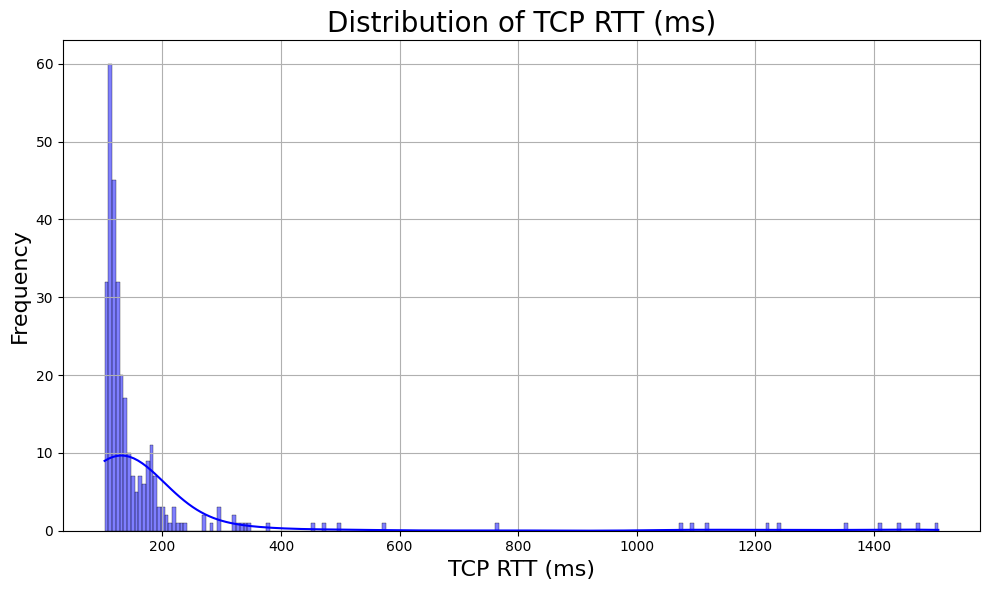

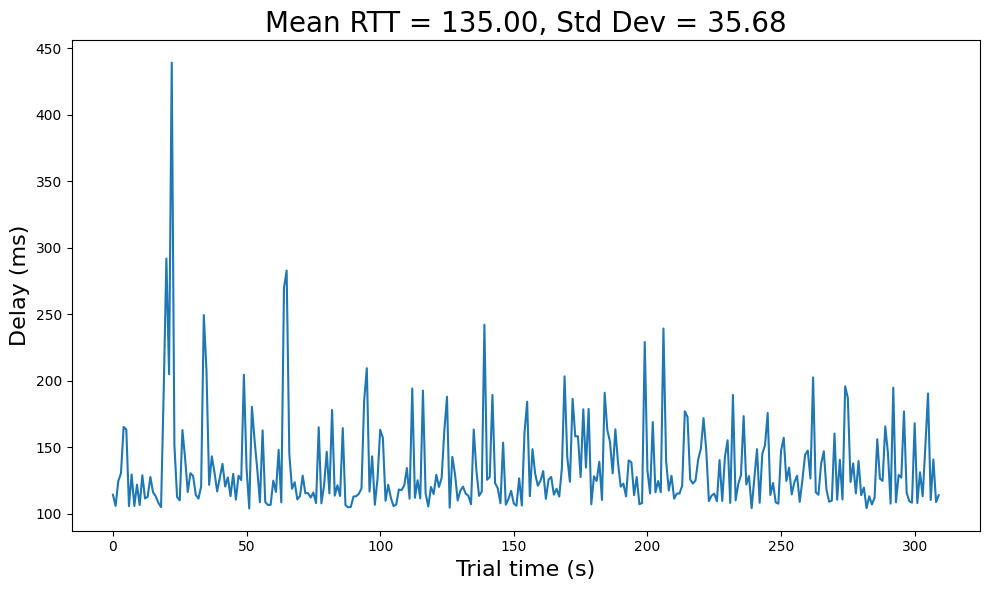

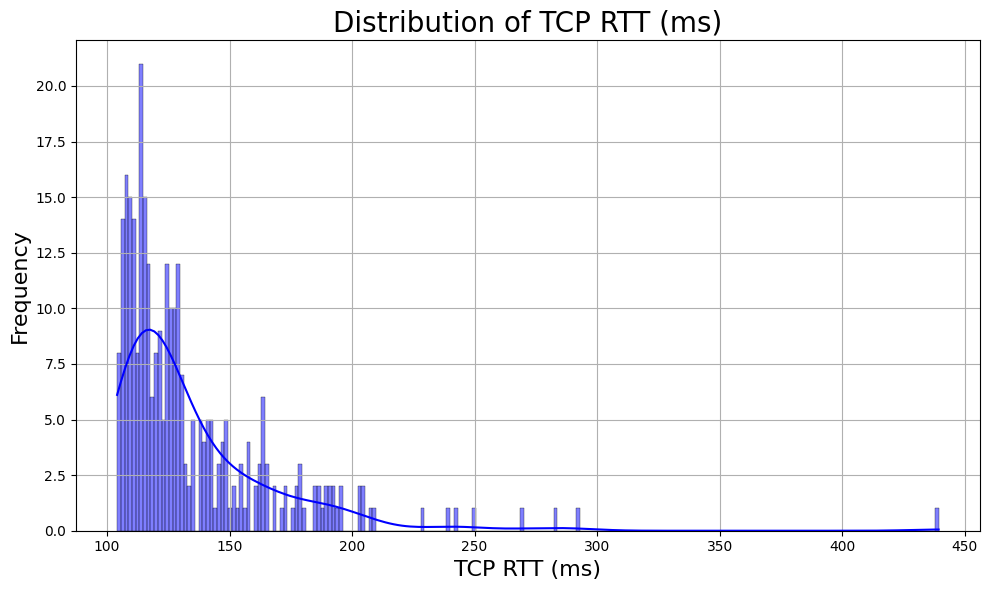

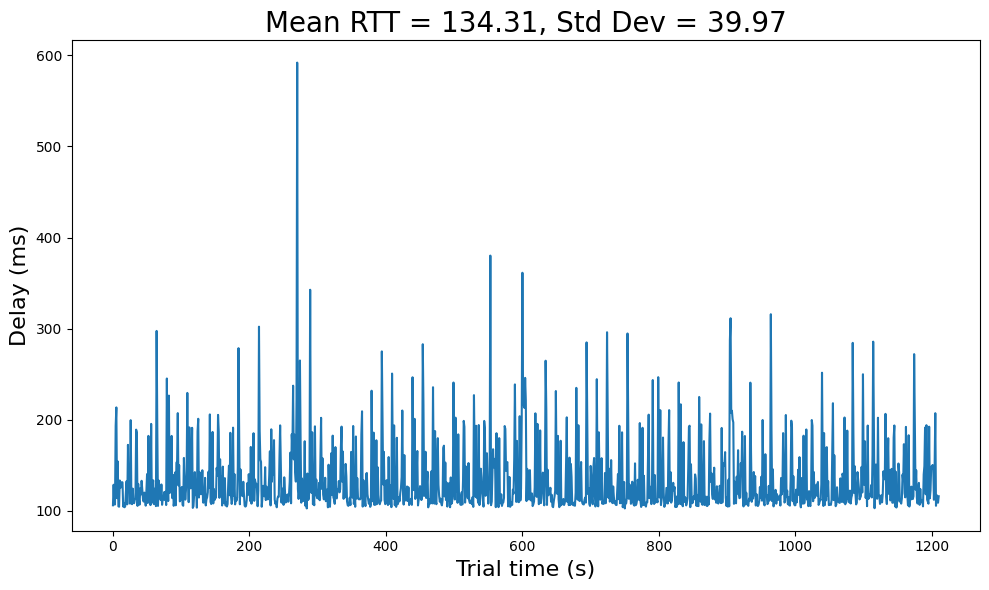

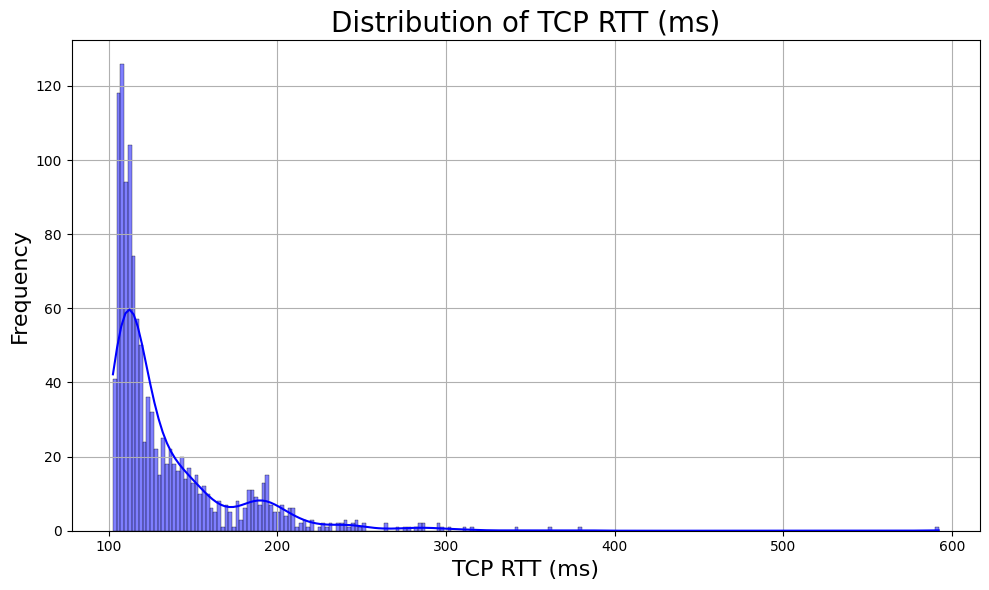

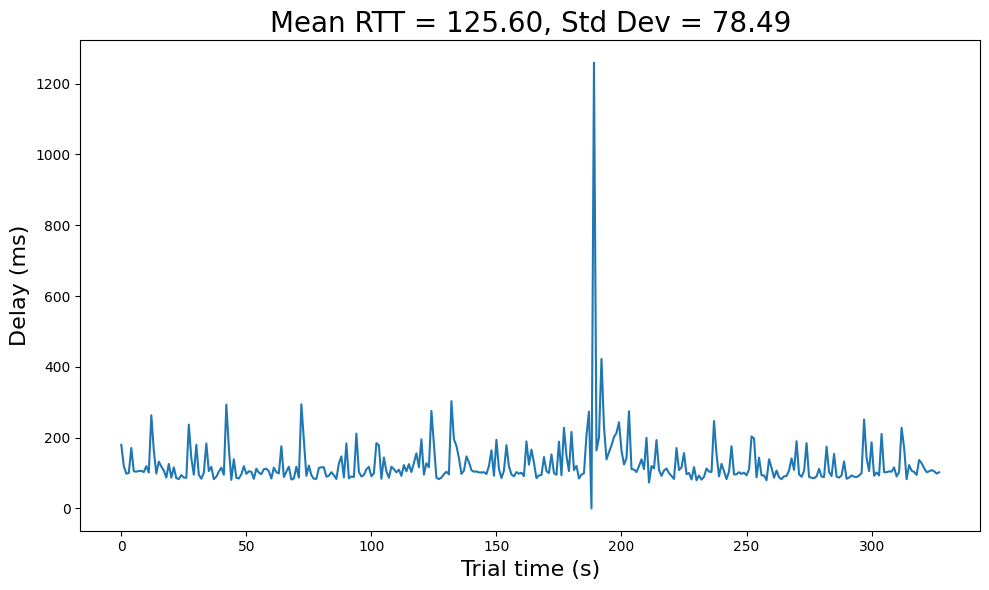

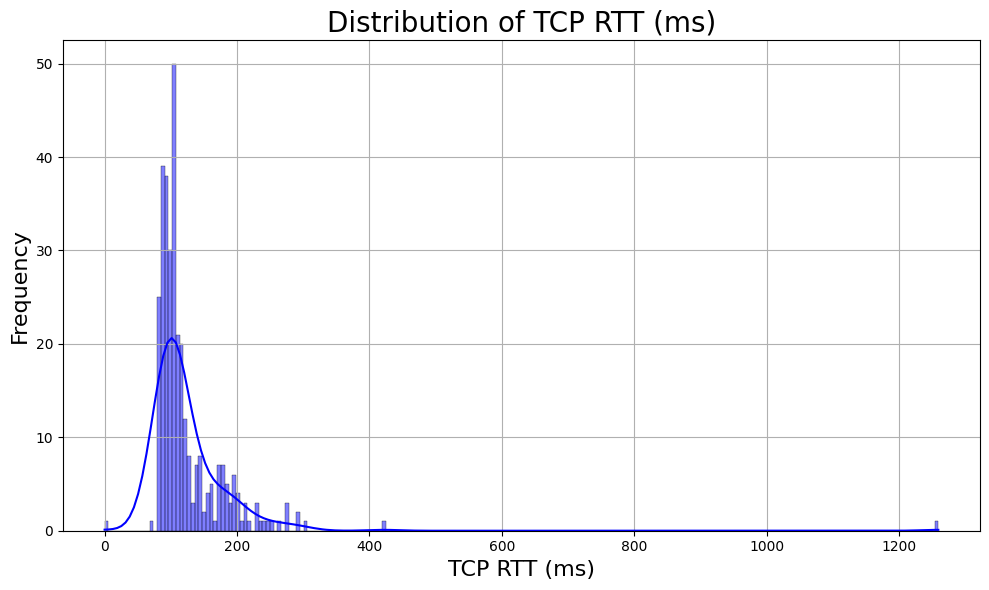

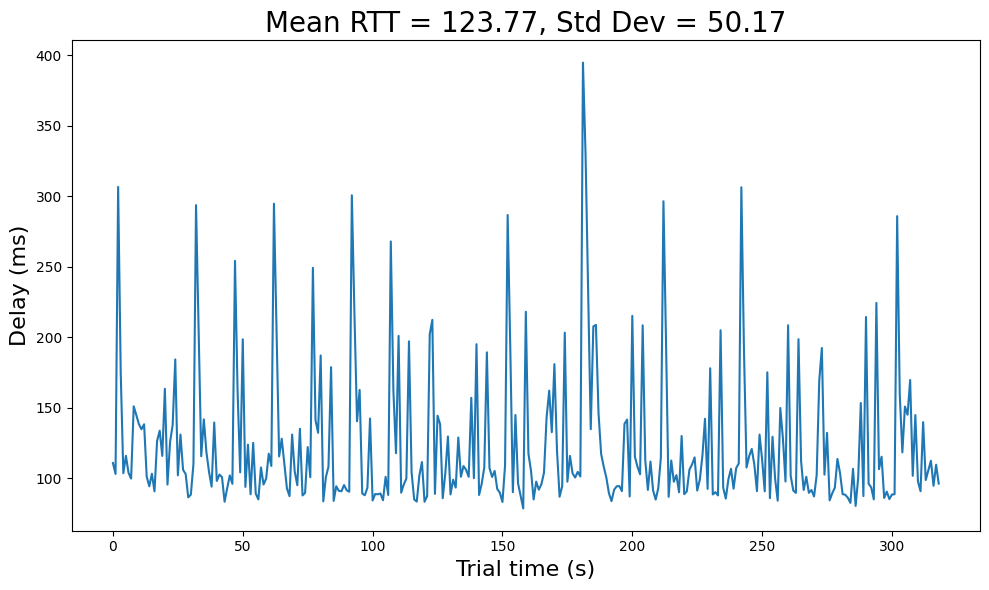

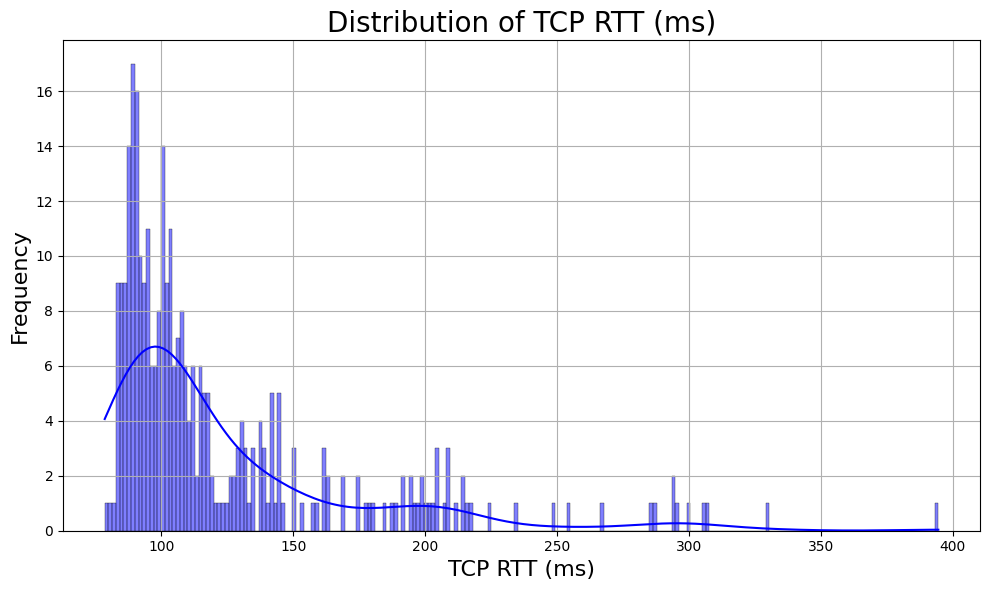

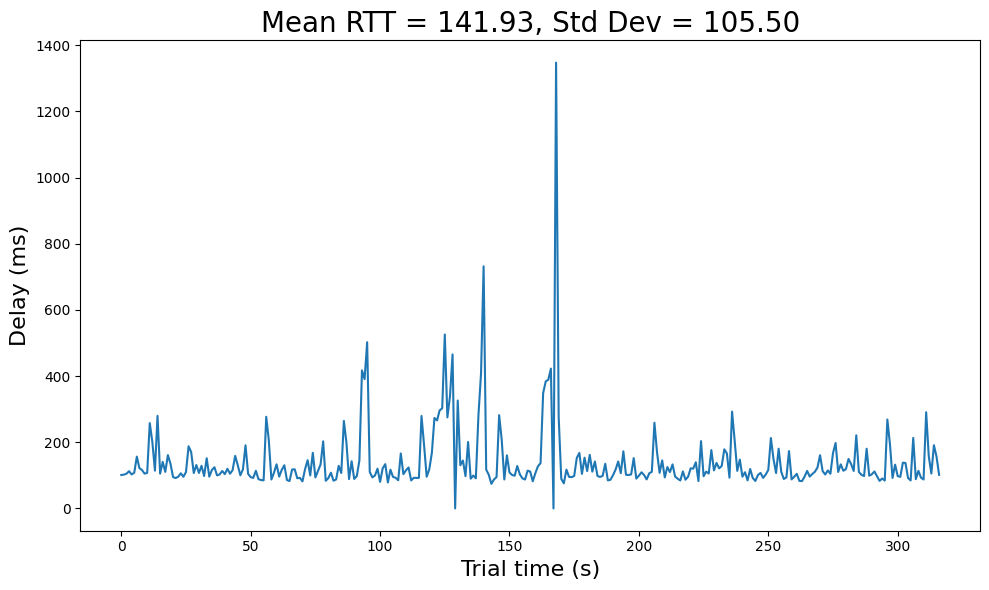

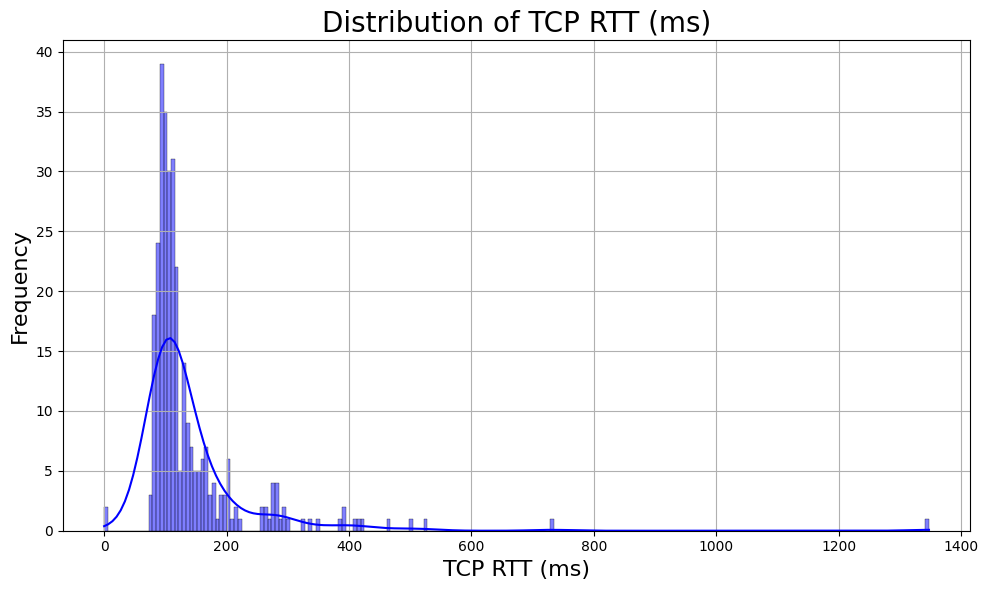

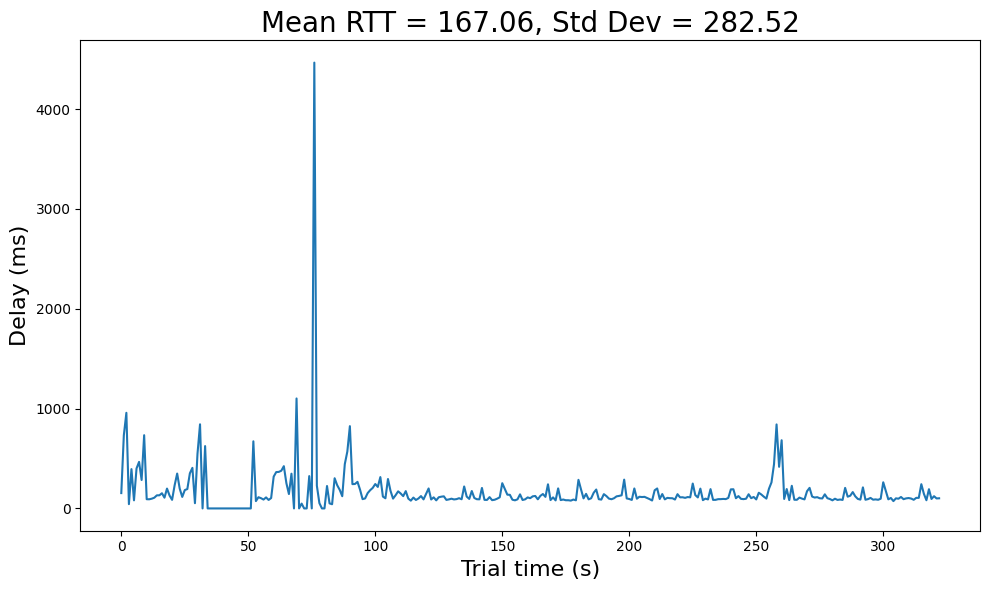

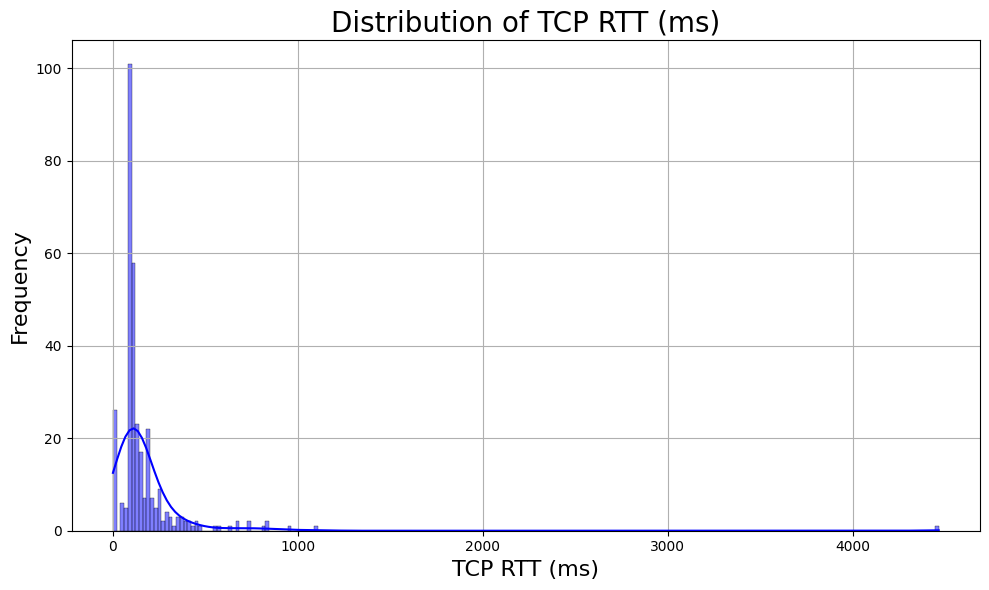

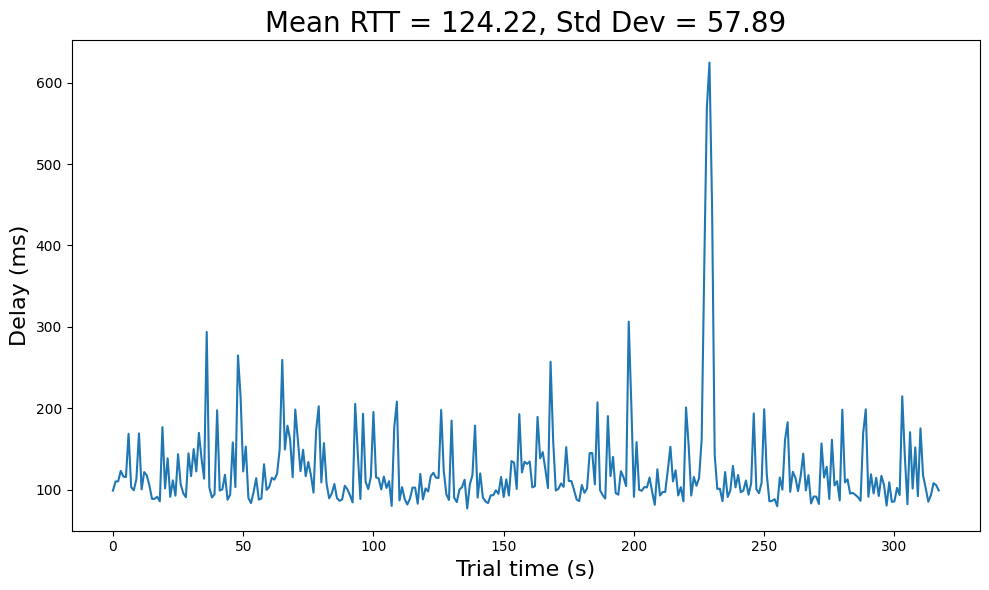

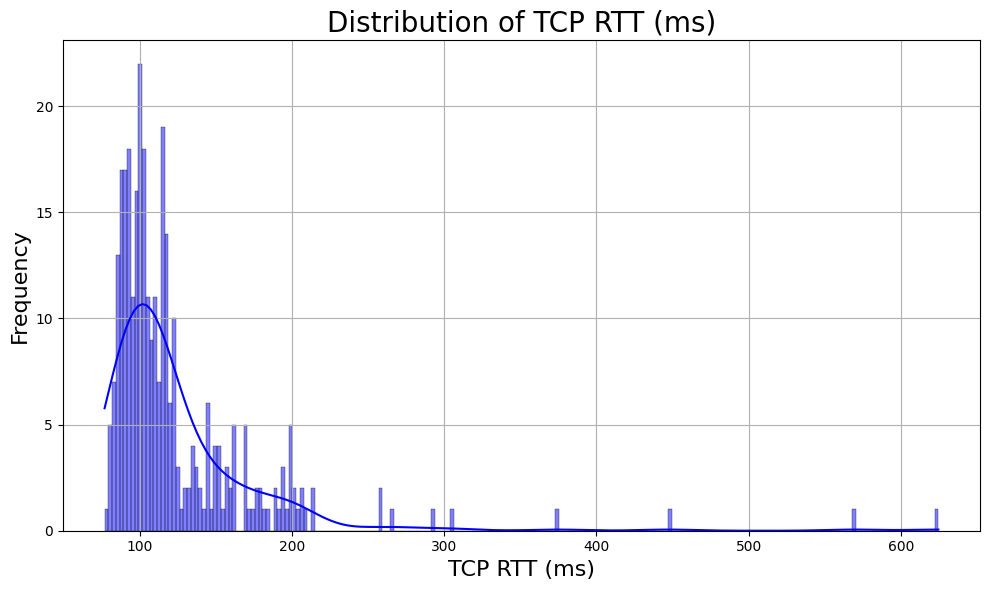

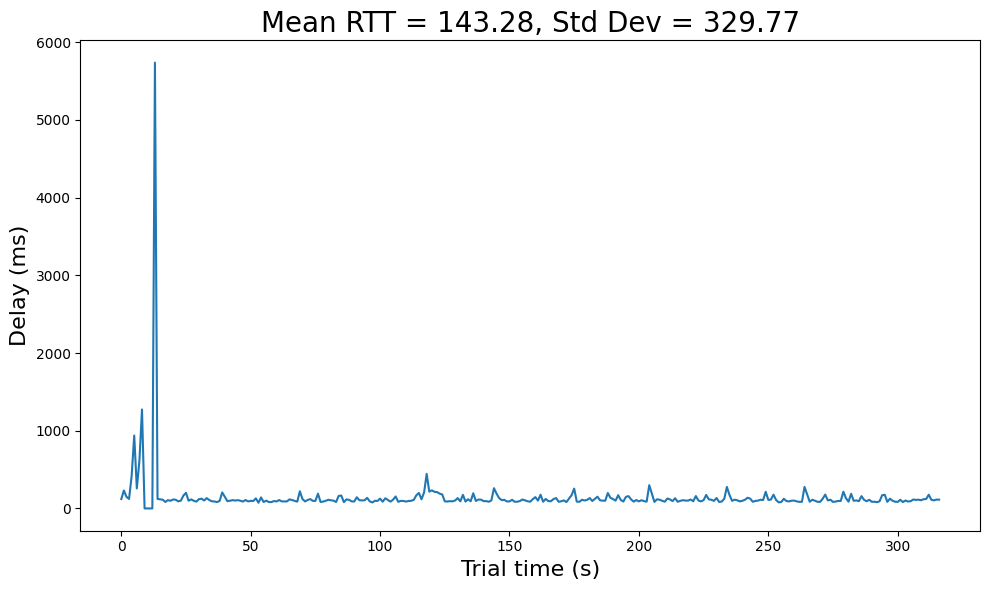

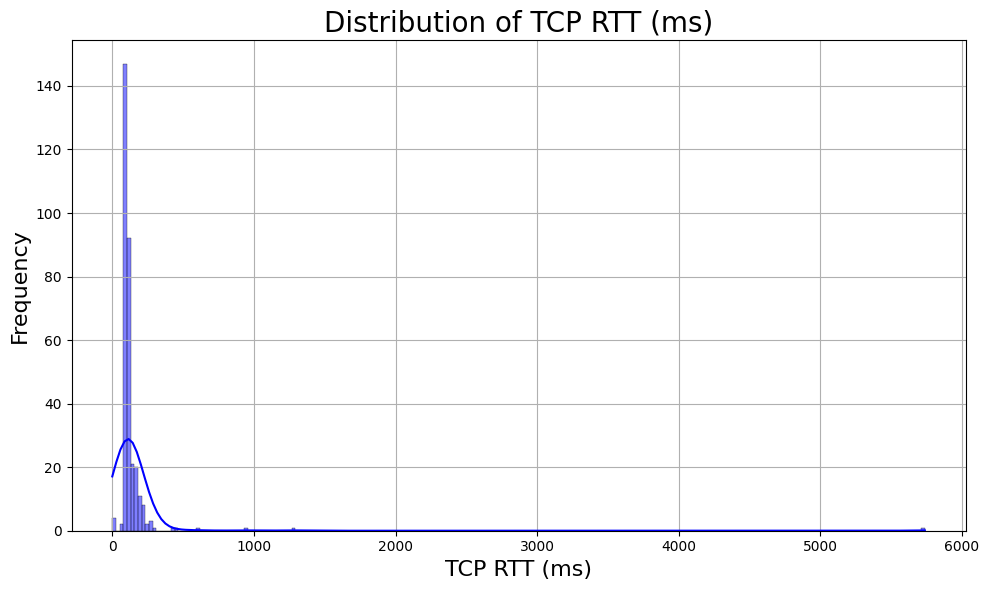

Mean RTD: 140.4096731507514, std 16.78818748853589
STD RTD: 106.33970480387164, std 97.36282239266684


In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mean_rtd_set = []
std_rtd_set = []

for name in ["Jaey", "Jason"]:
    for trial_num in range(1, 8):
        if name == "Jason" and trial_num == 7: break
        df = pd.read_csv(f"network_test_data/{name}OCU/trial{trial_num}.csv")

        mean_rtd = df["tcp_rtt (ms)"].mean()
        std_rtd = df["tcp_rtt (ms)"].std()

        mean_rtd_set.append(mean_rtd)
        std_rtd_set.append(std_rtd)

        plt.figure(figsize=(10, 6), facecolor="white")
        plt.plot(df["Interval start"], df["tcp_rtt (ms)"])
        plt.xlabel("Trial time (s)", fontsize=16)
        plt.ylabel("Delay (ms)", fontsize=16)
        plt.title(f"Mean RTT = {mean_rtd:.2f}, Std Dev = {std_rtd:.2f}", fontsize=20)
        # plt.savefig(f"rtt_{name}OCU_trial{trial_num}.png")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(10, 6), facecolor="white")
        sns.histplot(df["tcp_rtt (ms)"], kde=True, bins=222, color='blue')

        plt.title('Distribution of TCP RTT (ms)', fontsize=20)
        plt.xlabel('TCP RTT (ms)', fontsize=16)
        plt.ylabel('Frequency', fontsize=16)
        plt.grid(True)
        # plt.savefig(f"rtt_distribution_{name}OCU_trial{trial_num}.png")
        plt.tight_layout()
        plt.show()


print(f"Mean RTD: {np.mean(mean_rtd_set)}, std {np.std(mean_rtd_set)}")
print(f"STD RTD: {np.mean(std_rtd_set)}, std {np.std(std_rtd_set)}")
        

[[], [], [], []]


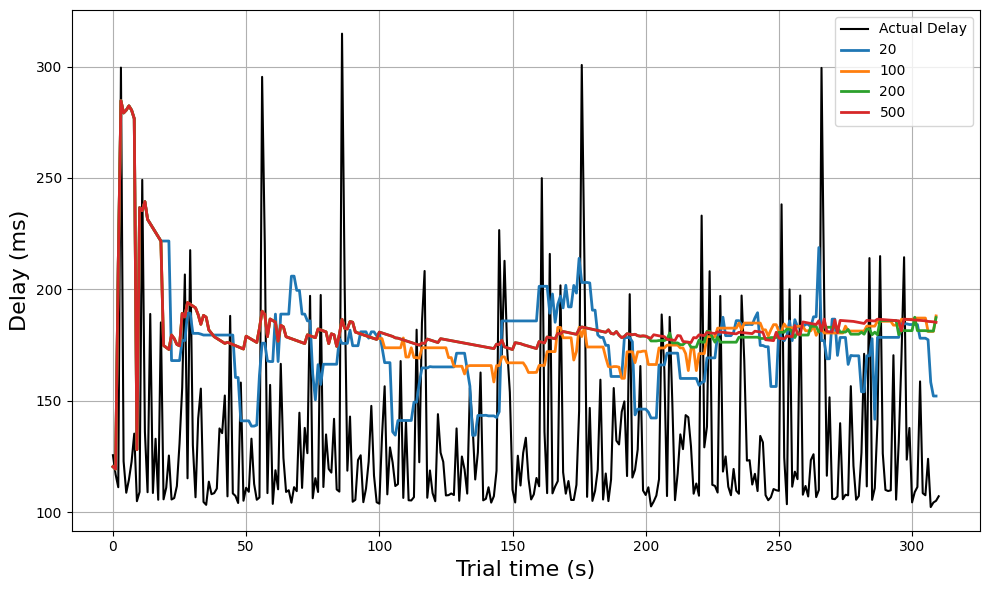

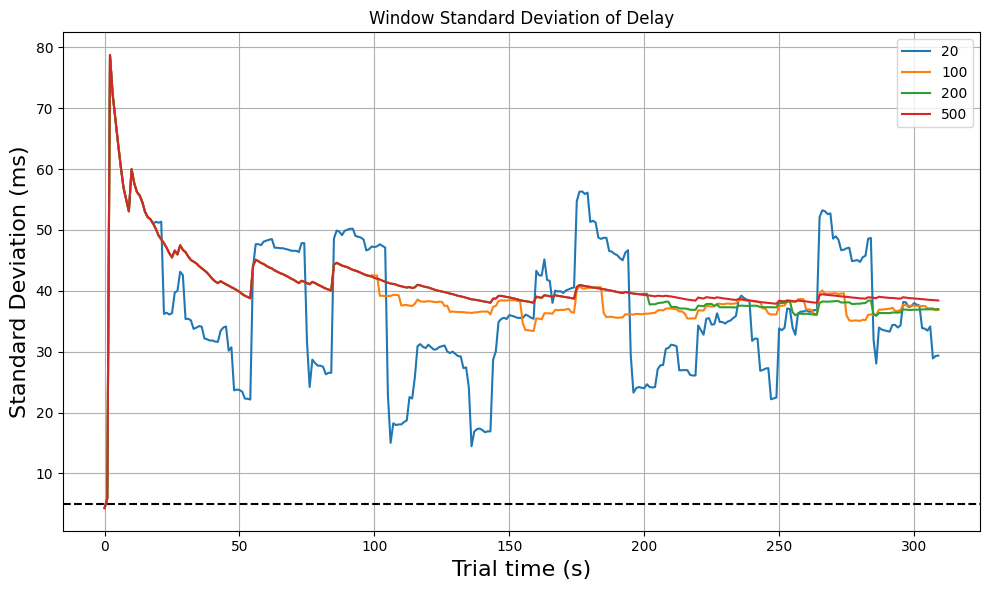

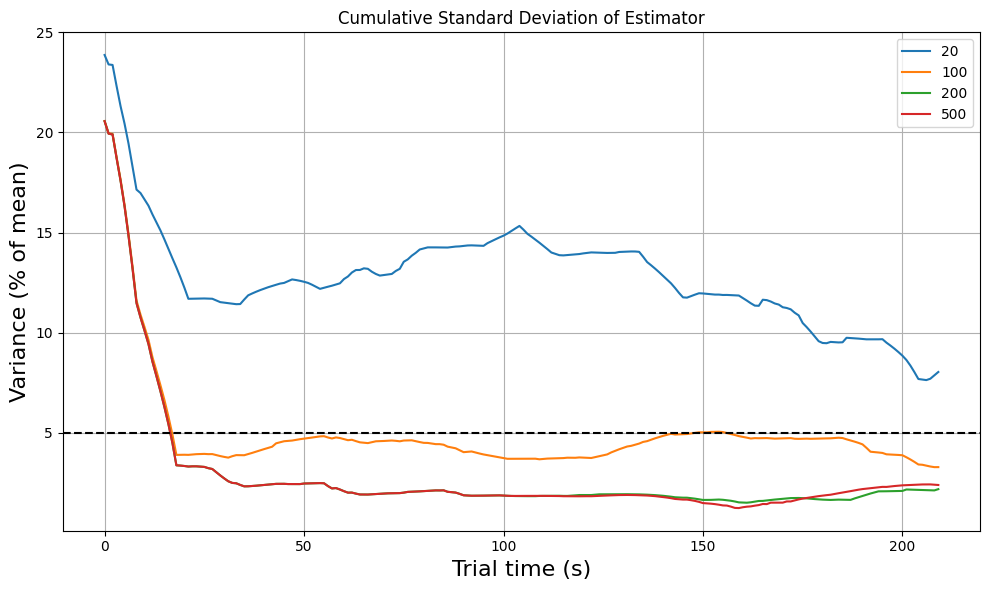

In [19]:
### Plot change in estimator
import distribution_estimation as de
import pandas as pd
import numpy as np


name = "Jaey"
trial_num = 1
df = pd.read_csv(f"network_test_data/{name}OCU/trial{trial_num}.csv")
bin_mode = "auto"
# window = 25
h10 = de.DistributionEstimation(bin_mode=bin_mode, window=10)
h20 = de.DistributionEstimation(bin_mode=bin_mode, window=20)
h50 = de.DistributionEstimation(bin_mode=bin_mode, window=50)
h100 = de.DistributionEstimation(bin_mode=bin_mode, window=100)
h200 = de.DistributionEstimation(bin_mode=bin_mode, window=200)
h500 = de.DistributionEstimation(bin_mode=bin_mode, window=500)

hist_objects = [h20, h100, h200, h500]
legend = ["20", "100", "200", "500"]
estimator = [[], [], [], []]
variances = [[], [], [], []]
estimator_variances = [[], [], [], []]
print(estimator)
for j, data_point in enumerate(df["tcp_rtt (ms)"]):
    for i, hist in enumerate(hist_objects):
        hist.update(data_point)
        # print(data_point)
        # print(hist.data)
        if j > 0:
            estimator[i].append(hist.get_value_at_percentile(90))
            variances[i].append(np.std(hist.data))
            estimator_variances[i].append(np.std(estimator[i][j-100:j]))
            # print(estimator[i])
        # print(pdf)
        # print(estimator[i][-1])
    
plt.figure(figsize=(10, 6), facecolor='white')
# plt.title("Actual Delay and Estimated 90th percentile delay")
plt.plot(df["tcp_rtt (ms)"], color='black')
for e in estimator:
    plt.plot(e, linewidth=2)
plt.legend(["Actual Delay"] + legend)
plt.xlabel("Trial time (s)", fontsize=16)
plt.ylabel("Delay (ms)", fontsize=16)
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6), facecolor="white")
plt.title("Window Standard Deviation of Delay")
for v in variances:
    plt.plot(np.array(v))
plt.xlabel("Trial time (s)", fontsize=16)
plt.ylabel("Standard Deviation (ms)", fontsize=16)
# plt.title(f"Mean RTT = {mean_rtd:.2f}, Std Dev = {std_rtd:.2f}", fontsize=20)
# plt.savefig(f"rtt_{name}OCU_trial{trial_num}.png")
plt.legend(legend)
plt.axhline(5, color='black', linestyle='--')

plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6), facecolor="white")
plt.title("Cumulative Standard Deviation of Estimator")
for v in estimator_variances:
    plt.plot(np.array(v[100:])/140*100)  # Converted to percentage of mean 140 ms
plt.xlabel("Trial time (s)", fontsize=16)
plt.ylabel("Variance (% of mean)", fontsize=16)
# plt.title(f"Mean RTT = {mean_rtd:.2f}, Std Dev = {std_rtd:.2f}", fontsize=20)
# plt.savefig(f"rtt_{name}OCU_trial{trial_num}.png")
plt.legend(legend)
plt.axhline(5, color='black', linestyle='--')
plt.tight_layout()
plt.grid(True)
plt.show()

In [5]:
np.std(estimator[0][:200])

22.384575342143826